# The "Loop"-experiment

The [Loop Based Architecture](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.113.120501) is a photonic experiment, that allows scalable implementation Boson Sampling and arbitrary unitaries on a photonic platform.
It can be implemented as a single, sequenced or nested architecture (see figures).
It promises better scalability, as a nested sequence of two loops are able to implement an arbitrary sized unitary on time-bin encoded qubits.

<table><tr><td>
<!--![Single Loop](https://journals.aps.org/prl/article/10.1103/PhysRevLett.113.120501/figures/1/medium) -->
    <img src="https://journals.aps.org/prl/article/10.1103/PhysRevLett.113.120501/figures/1/medium" alt="Single Loop"/>
    <br><center><h3>Fig. 1 Single Loop</h3></center>
    </td><td>    
    <img src="https://journals.aps.org/prl/article/10.1103/PhysRevLett.113.120501/figures/5/medium" alt="Nested Loop"/><br><center><h3>Fig. 2 Nested Loop</h3></center>
<!--![Double Loop](https://journals.aps.org/prl/article/10.1103/PhysRevLett.113.120501/figures/5/medium)|-->
    </td></tr></table>

# 1. Creating a circuit
We use the python framework [Perceval](https://perceval.quandela.net/docs) to simulate our experiments.
We simulate the conversion of the time-bin encoded setup as path encoded photonic qubits (see Fig. 1 (b) )

### 1.1 Perfect Case / No Losses
#### 1.1.1 Three Photons that "loop" six times and create an interferometer of 3 photons in 6 modes

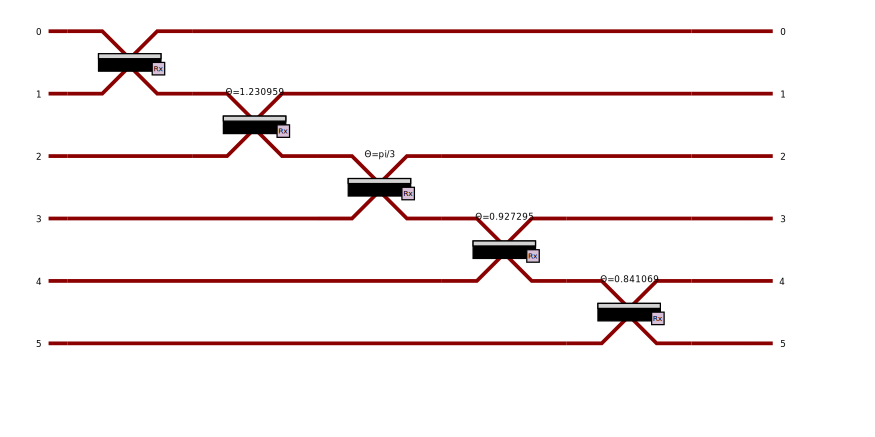

In [3]:
import perceval as pcvl
from extraction.Loop import *

l = Loop(width=6,depth=1, phs_in=3,phs_out=3,in_state=[1,0,1,0,1,0])
pcvl.pdisplay(l.experiment_circuit)

#### 1.1.1 Three Photons that "loop" six times in the inner loop and twice in the outer loop to create an interferometer of 3 photons in 6 modes

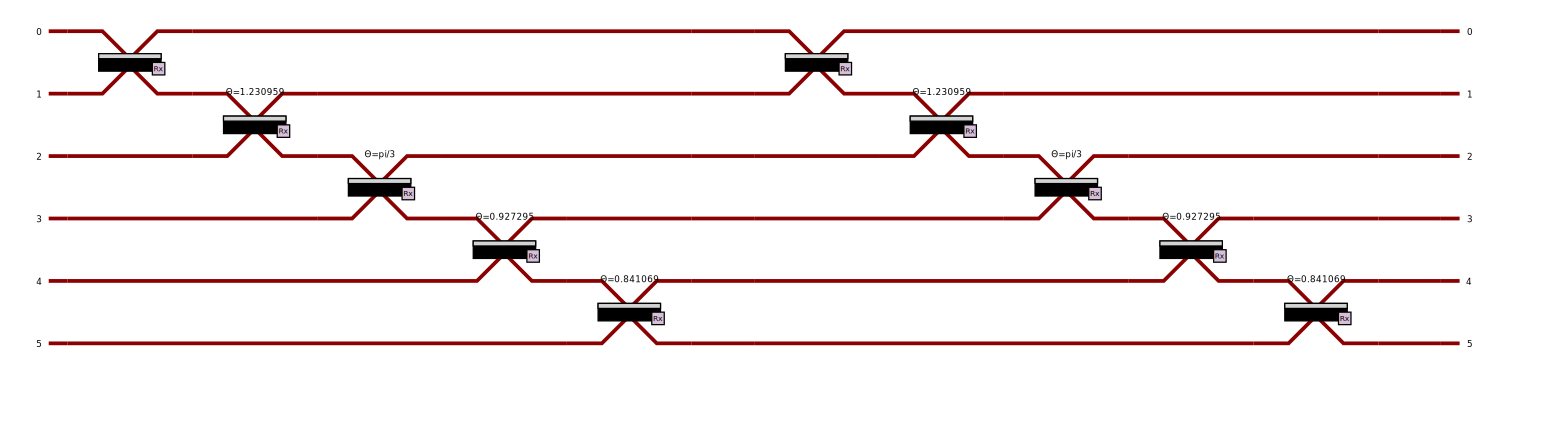

In [8]:
import perceval as pcvl
from extraction.Loop import *

l = Loop(width=6,depth=2, phs_in=3,phs_out=3,in_state=[1,0,1,0,1,0])
pcvl.pdisplay(l.experiment_circuit)

### 1.2 Optical Loss (Lossy Channels):
There are 3 kind of losses:
- Loss of the source: **loss_source**
- Loss of the inner loop: **loss_inner**
- Loss of the outer loop: **loss_outer**

The losses are simulated by adding a Beamsplitter with the respective reflectivity. _Each loss ends up in a new mode in the perceval circuit_

<b> _Perceval_ has an implementation of a [loss-channel](https://perceval.quandela.net/docs/components.html#loss-channel). However, we use our own implementation of Photon loss, that is more efficient in our case and does allow us to simulate larger experiments with losses </b>

We can simulate more efficiently, as we can reduce the number of potential output states significantly, because we specify the number of in- and output photons and calculate the output states based on that. With that, our photonic circuit is purely **unitary** while the default implementation of percevals loss-channel is defined as **non-unitary**

#### 1.2.1 Three Photons that “loop” six times and create an interferometer of 3 photons in 6 modes

There is a probility of loss of 20% in the inner loop

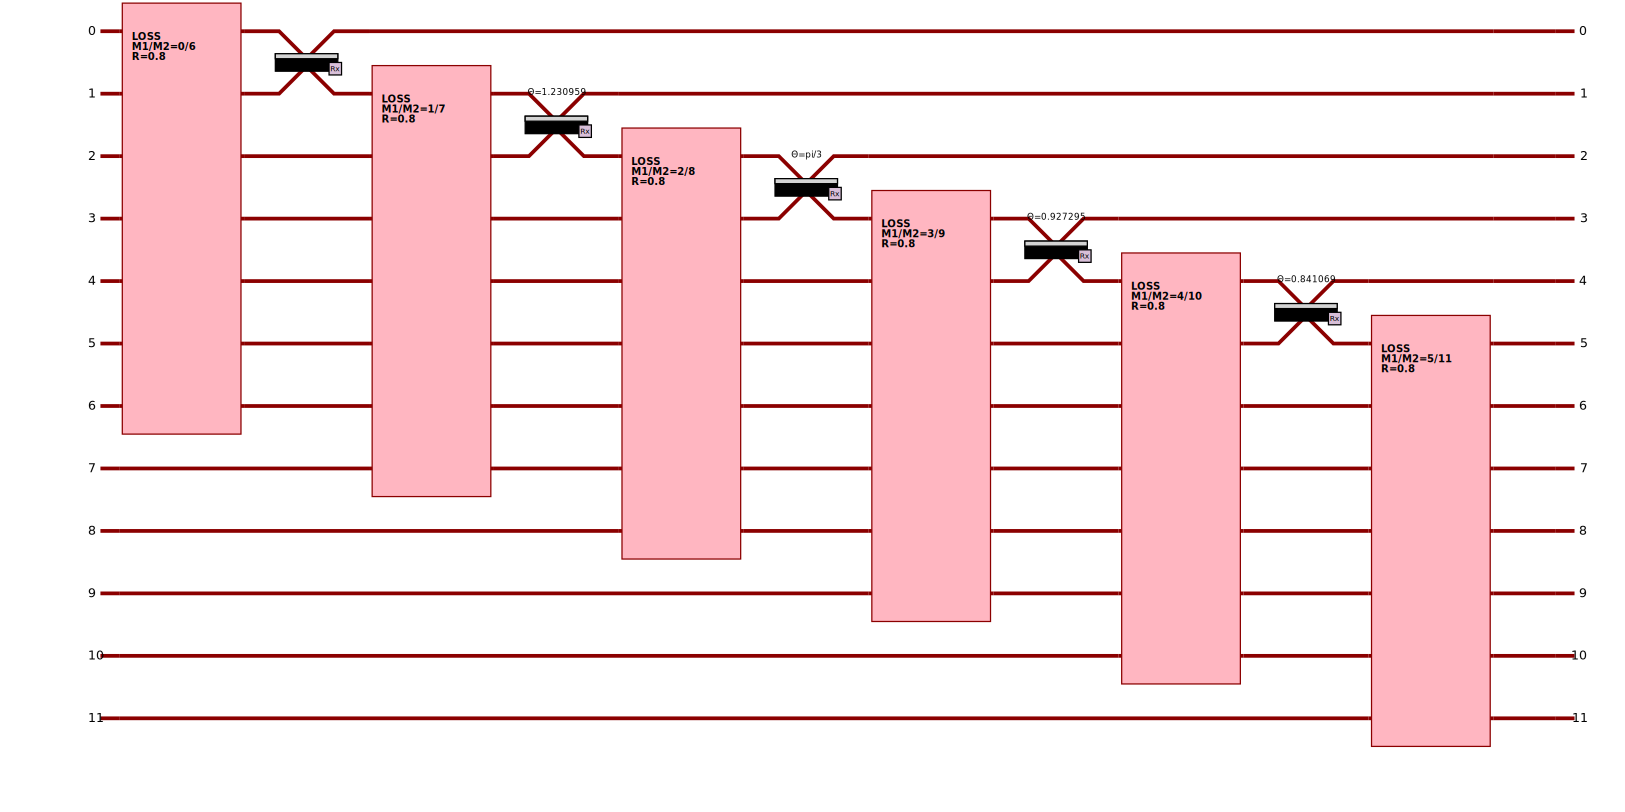

In [9]:
import perceval as pcvl
from extraction.Loop import *

l = Loop(width=6,depth=1, phs_in=3,phs_out=3,loss_loop_inner=0.2, in_state=[1,0,1,0,1,0])
pcvl.pdisplay(l.experiment_circuit)

#### 1.2.2 Three Photons that “loop” six times and create an interferometer of 3 photons in 6 modes

Losses are losses on source (75%), inner loop (20%) and outer loop (25%)

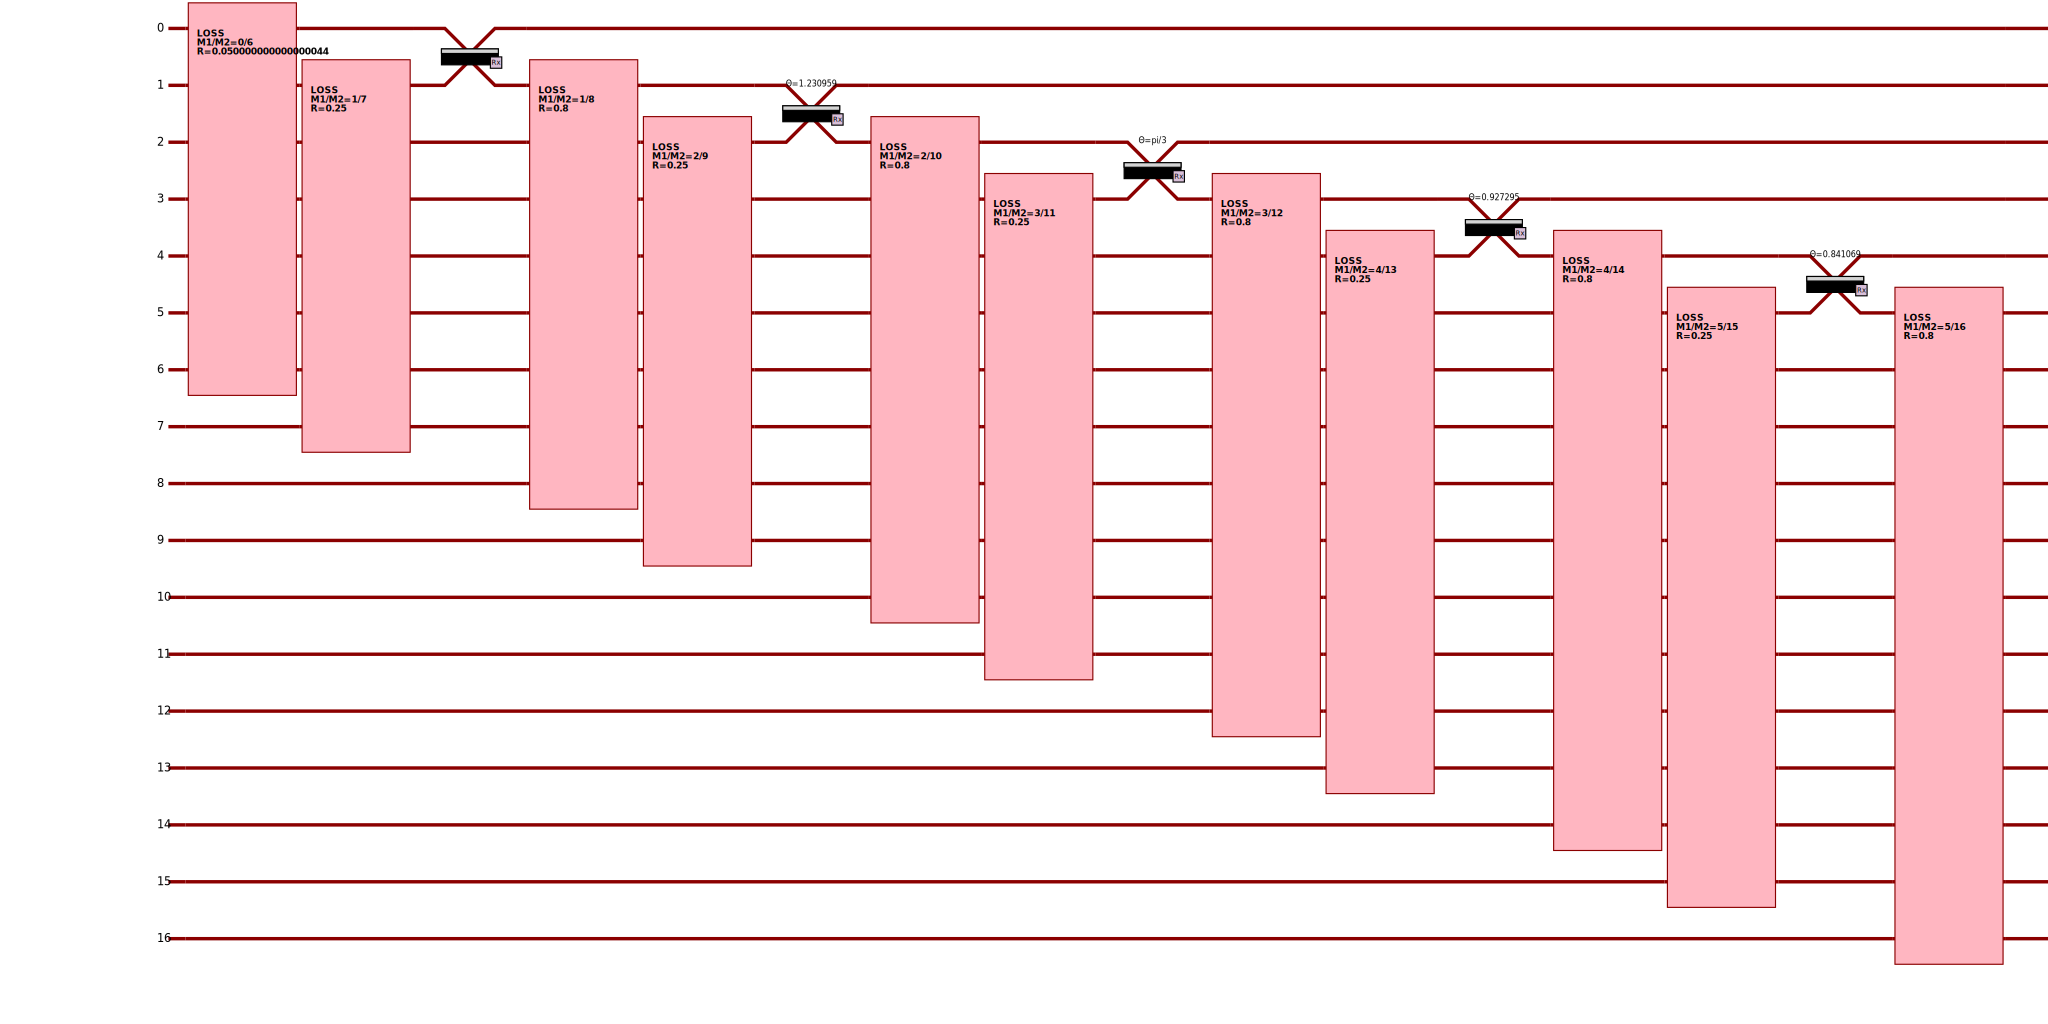

In [7]:
import perceval as pcvl
from extraction.Loop import *

l = Loop(width=6,depth=1, phs_in=3,phs_out=3,loss_Source=0.75, loss_loop_inner=0.2, loss_loop_outer=0.25, in_state=[1,0,1,0,1,0])
pcvl.pdisplay(l.experiment_circuit)

### 1.3 Photon loss
Our implementation allows simulating experiments with and without photon loss -- aka, that less photons are detects as _clicks_ as we input states. This can be specified by the parameters _phs_in_ and _phs_out_ of the _Loop_ class


In [12]:
import perceval as pcvl
from extraction.Loop import *

l = Loop(width=6,depth=1,phs_in=3,phs_out=2,loss_loop_inner=.2, in_state=[1,0,1,0,1,0])

# 2. Simulate the experiment with and without Photon Loss

**Simulation:** The simulation uses the _all_probs_ function of percevals _Naive_ backend

    backend = pcvl.BackendFactory.get_backend("Naive")(l.experiment_circuit)
    prob = sim.prob(input_state=l.in_state, output_state=xxx)


**Parallel Execution:** To simulate large experiments, it's advisable to run the simulation in parallel. This means, the calculation of the pobability of potential output states is are split among several processes from pyhtons [mulitprocessing](https://docs.python.org/3/library/multiprocessing.html) library

### 2.1 Simulating without photon loss with single process and plot distribution

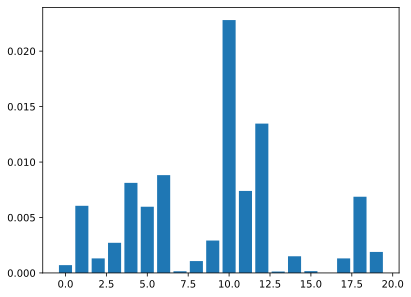

In [3]:
import perceval as pcvl
from extraction.Loop import *
import matplotlib.pyplot as plt

l = Loop(width=6,depth=2, phs_in=3,phs_out=3,loss_loop_inner=0.15, in_state=[1,0,1,0,1,0])
final_list = l.run(in_state=[1,0,1,0,1,0])

plt.bar(range(len(final_list)),final_list.values())
plt.show()

### 2.2 Simulating with photon loss on multiple processes and plot distribution

It's possible to specify the number of processes and chunks:
1. **processes=x**: the overall simulation is taken by x processes. This number should fit your CPU kernsels
2. **chunks=x**: the number of output states is devided in x chunks that are given to the processes. If there are more chunks than processes, a new chunk will be given to a new process, once the process is done. Generally, chunks and process can be the same number

calculated 0 of 2940
calculated 2940 of 2940


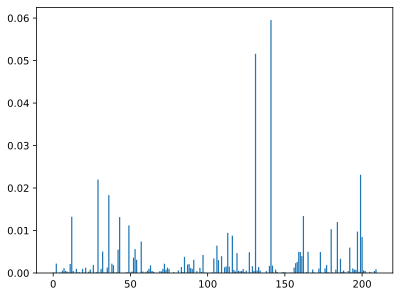

In [5]:
import perceval as pcvl
from extraction.Loop import *
import matplotlib.pyplot as plt

l = Loop(width=10,depth=1, phs_in=5,phs_out=4,loss_loop_inner=0.2, in_state=[1,0]*5)
final_list = l.run(in_state=[1,0]*5, processes=5, chunks=5)

plt.bar(range(len(final_list)),final_list.values())
plt.show()